<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Multiple Regression Base Case

In [39]:
# Housing dataset again
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.shape

(1460, 81)

In [0]:
# Log transform the y
df['ln_price'] = np.log(df['SalePrice'])

In [42]:
# Work out the nans and drop objects
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)
df.drop(df.select_dtypes('object'),axis=1,inplace=True)
df.drop('LotFrontage',axis=1,inplace=True)
df.dropna(inplace=True, axis=0)
df.shape

(1452, 38)

In [44]:
df.isna().sum().sort_values()[-5:]

LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtFinSF2      0
ln_price        0
dtype: int64

In [0]:
# Regression function
def run_regression(X, y):
    # Split data 80/20 for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    # Train the model using the training sets
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Intercept value
    print("\nIntercept Value:", model.intercept_)

    # The slope coefficient
    print("Slope Coefficients:", model.coef_[0])

    # Root mean squared error
    print("RMSE: %.2f" % mean_squared_error(y_test, y_pred)**0.5)

    # Explained variance score: 1 is perfect prediction
    print('R^2: %.2f' % r2_score(y_test, y_pred))

In [208]:
# Run the OLS regression 
# on everything except Id and sale prince and lnprice
X = df.iloc[:,1:-2]
y = df[['ln_price']]
run_regression(X,y)


Intercept Value: [16.06485943]
Slope Coefficients: [-6.19853849e-04  1.82001046e-06  8.77762608e-02  4.59494873e-02
  2.93399966e-03  1.28225251e-03  1.37042797e-05  1.94509993e-05
  1.11885066e-05 -1.15644272e-06  2.94830632e-05  5.32236159e-05
  1.36950494e-05  7.00412192e-05  1.36959885e-04  6.88497755e-02
  1.87077018e-02  3.93654815e-02  1.62562910e-02  1.98823329e-03
 -5.61044819e-02  1.52132635e-02  4.57797192e-02 -1.90661390e-04
  7.45466507e-02  1.06694490e-05  1.28615683e-04 -4.42124765e-05
  2.07481070e-04  2.87890064e-04  3.21436814e-04 -3.41442467e-04
 -2.61858972e-06  9.90759951e-04 -6.68234001e-03]
RMSE: 0.14
R^2: 0.89


# Bivariate Regression Gradient Descent

In [74]:
df.corr()['ln_price'].sort_values()[-5:]

GarageCars     0.679780
GrLivArea      0.701458
OverallQual    0.816432
SalePrice      0.948430
ln_price       1.000000
Name: ln_price, dtype: float64

In [210]:
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = df['OverallQual']
y = df['ln_price']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

# Hyperparams
alpha = 0.01 #Step size
iterations = 500 #No. of iterations
m = y.size #No. of data points
np.random.seed(42) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


# Gradient descent function
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 11.95, 0.33


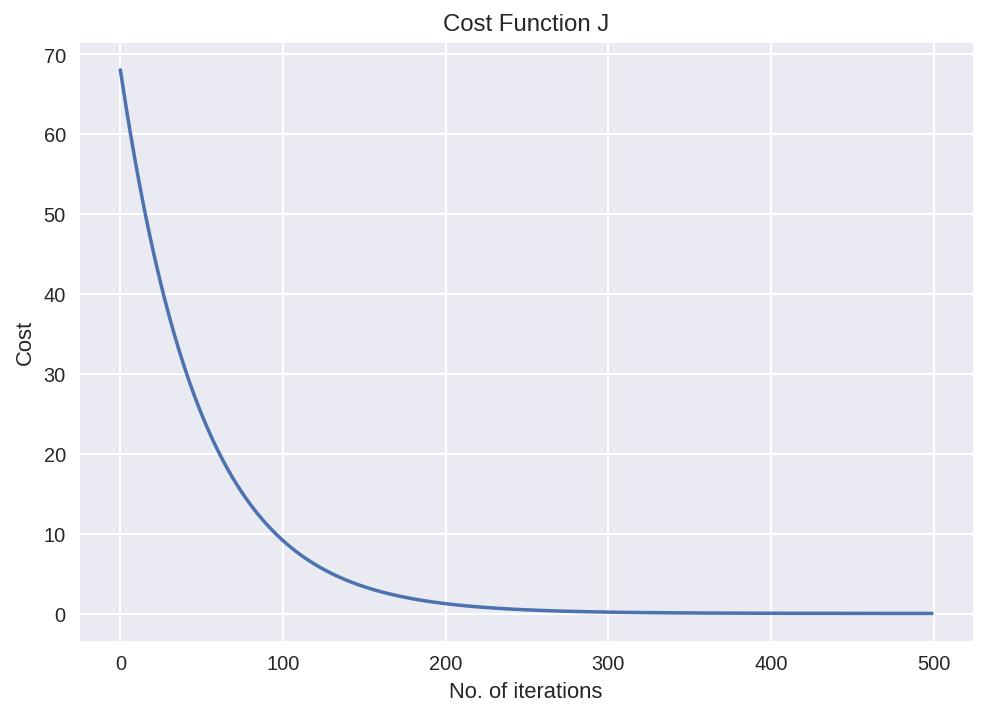

In [211]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

**Theta list needs to be updated for multi variate cost functions. This is important.**

# Multiple Regression Gradient Descent

In [212]:
# how many 0s to add
len(df.iloc[:,1:-2].columns)

35

In [0]:
# Load and standardize x and y
imp
x = df.iloc[:,1:-2]
y = df[['ln_price']].values
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

# Setting the matrixes
ones = np.ones([x.shape[0],1])
x = np.concatenate((ones,x),axis=1)
theta = np.zeros([1,36])

# Set hyperparams
alpha = 0.01
iters = 150

In [215]:
# Cost function
def Cost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))
  
Cost(x,y,theta)

0.5

Let's use gradient descent to minimize this cost

In [216]:
# Gradient descent function
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = Cost(X, y, theta)
    
    return theta,cost

# Running the gradient descent and cost function
t,cost = gradientDescent(x,y,theta,iters,alpha)
print('Updated thetas:\n',t)

finalCost = Cost(x,y,t)
print('Mean squared error has been minimized to',finalCost)

Updated thetas:
 [[ 4.12954030e-16 -3.79203909e-02  4.02765400e-02  1.92069102e-01
   8.58059469e-02  9.84689783e-02  1.04890017e-01  3.01327139e-02
   5.66244646e-02  1.28108908e-02  1.62478495e-02  7.99766250e-02
   7.95409862e-02  5.63579980e-02 -2.31962506e-03  1.04835848e-01
   5.84817237e-02  7.03608209e-03  7.88868495e-02  4.70880969e-02
   1.28368406e-02 -5.40713799e-02  7.24320159e-02  9.22495518e-02
   6.34665478e-02  9.34332557e-02  6.77456675e-02  4.34862798e-02
   1.35763613e-02  7.51654641e-03  1.56405655e-02  4.09170322e-02
  -2.24342881e-02 -1.18880041e-03  8.84980147e-03 -1.41493673e-02]]
Mean squared error has been minimized to 0.07131740259857636


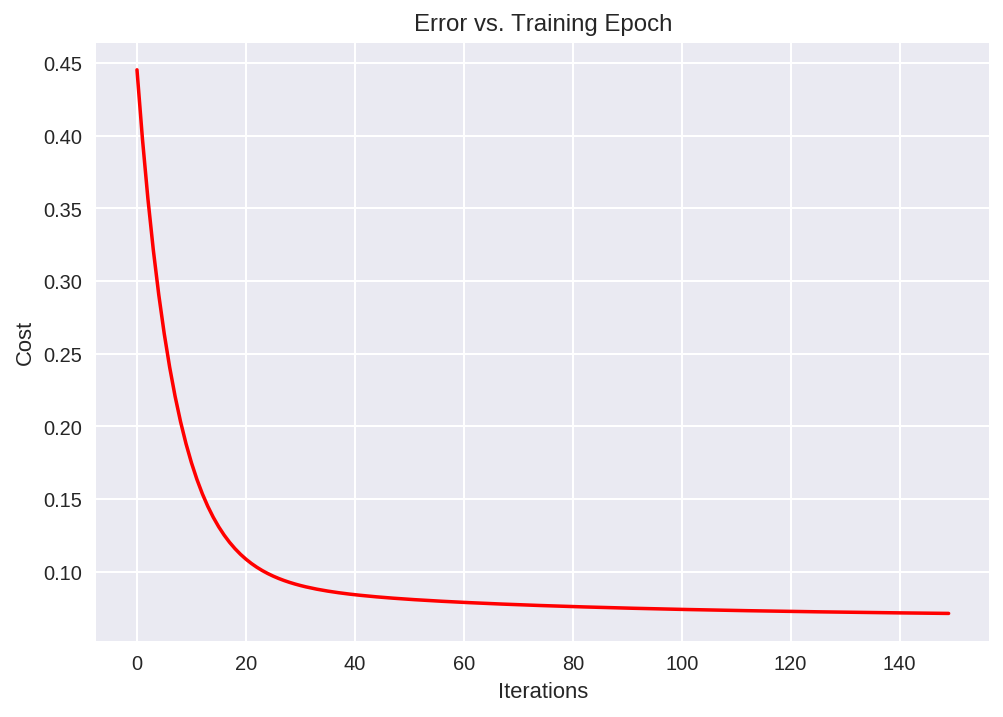

In [217]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch');

In [221]:
# # Load and standardize features
# X = df.iloc[:,1:-2]
# y = df[['ln_price']]
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Gradient Descent Overview**

Traditional gradient descent methods don't work well when there's lots of data. Stochastic gradient descent can be used to greatly reduce the time. By randomly select a subset of data at every step in the gradient, SGD reduces the time spent calculating the derivatives of the loss function. Regardless of which loss function we use, gradient descent works the same way:

1. Take the derivative of the loss function for each parameter in it. (gradient of the loss function).
2. Pick random values for the parameters.
3. Plug the parameter values into the derivatives (gradient).
4. Calculate the step sizes. Step size = slope * learning rate
5. Calculate the new parameters. New parameter = old param - step size.
6. Go back to step 3 until step size is very small or you reach the maximum number of iterations.

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)